## Exploratory Data Analysis

- Which variables have higher impact in the Happiness Score?
- Which countries have make it to the podium to the top/bottom 10 the last 8 years?
- Which countries are in the top/bottom 10%til in happiness?
- Overall best performing country in each category by average.
- Has people become happier over the years?
- Compare happiness score accross regions, and rest of the features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# newest interface
from seaborn import axes_style, objects as so
from matplotlib.figure import Figure

In [2]:
df = pd.read_csv('../data/processed/WorldHappiness2015_2022.csv')
df

Year      Country  Happiness Rank  Happiness Score  Freedom  Generosity  \
0     2015  Switzerland               1            7.587  0.66557     0.29678   
1     2015      Iceland               2            7.561  0.62877     0.43630   
2     2015      Denmark               3            7.527  0.64938     0.34139   
3     2015       Norway               4            7.522  0.66973     0.34699   
4     2015       Canada               5            7.427  0.63297     0.45811   
...    ...          ...             ...              ...      ...         ...   
1225  2022     Botswana             142            3.471  0.57100     0.01200   
1226  2022       Rwanda             143            3.268  0.62100     0.18700   
1227  2022     Zimbabwe             144            2.995  0.32900     0.10600   
1228  2022      Lebanon             145            2.955  0.10300     0.08200   
1229  2022  Afghanistan             146            2.404  0.00000     0.08900   

      Healthy life expectancy  Perceptions of corruption  GDP per capita  \
0                     0.94143                    0.41978         1.39651   
1                     0.94784                    0.14145         1.30232   
2                     0.87464                    0.48357         1.32548   
3                     0.88521                    0.36503         1.45900   
4                     0.90563                    0.32957         1.32629   
...                       ...                        ...             ...   
1225                  0.28000                    0.10200         1.50300   
1226                  0.46200                    0.54400         0.78500   
1227                  0.27000                    0.10500         0.94700   
1228                  0.63100                    0.03400         1.39200   
1229                  0.28900                    0.00500         0.75800   

      Social support  Dystopia Residual                           Region  
0           1.422681            2.51738                   Western Europe  
1           1.461513            2.70201                   Western Europe  
2           1.403490            2.49204                   Western Europe  
3           1.401235            2.46531                   Western Europe  
4           1.340878            2.45176                    North America  
...              ...                ...                              ...  
1225        0.815000            0.18700               Sub-Saharan Africa  
1226        0.133000            0.53600               Sub-Saharan Africa  
1227        0.690000            0.54800               Sub-Saharan Africa  
1228        0.498000            0.21600  Middle East and Northern Africa  
1229        0.000000            1.26300                    Southern Asia  

[1230 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1230 non-null   int64  
 1   Country                    1230 non-null   object 
 2   Happiness Rank             1230 non-null   int64  
 3   Happiness Score            1230 non-null   float64
 4   Freedom                    1230 non-null   float64
 5   Generosity                 1230 non-null   float64
 6   Healthy life expectancy    1230 non-null   float64
 7   Perceptions of corruption  1230 non-null   float64
 8   GDP per capita             1230 non-null   float64
 9   Social support             1230 non-null   float64
 10  Dystopia Residual          1230 non-null   float64
 11  Region                     1230 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 115.4+ KB


In [4]:
df.describe()

Year  Happiness Rank  Happiness Score      Freedom   Generosity  \
count  1230.000000     1230.000000      1230.000000  1230.000000  1230.000000   
mean   2018.447154       77.421951         5.430092     0.440833     0.201583   
std       2.282716       44.486273         1.115361     0.154415     0.115522   
min    2015.000000        1.000000         2.404000     0.000000     0.000000   
25%    2016.000000       39.000000         4.584500     0.344250     0.118000   
50%    2018.000000       77.000000         5.410500     0.458135     0.186984   
75%    2020.000000      116.000000         6.226225     0.559000     0.258494   
max    2022.000000      158.000000         7.842000     0.740000     0.838075   

       Healthy life expectancy  Perceptions of corruption  GDP per capita  \
count              1230.000000                1230.000000     1230.000000   
mean                  0.608132                   0.130853        0.976255   
std                   0.241249                   0.110825        0.435247   
min                   0.000000                   0.000000        0.000000   
25%                   0.439250                   0.056000        0.668250   
50%                   0.639427                   0.096000        1.013580   
75%                   0.790795                   0.164000        1.295961   
max                   1.141000                   0.587000        2.209000   

       Social support  Dystopia Residual  
count     1230.000000        1230.000000  
mean         1.065996           2.075714  
std          0.313113           0.548311  
min          0.000000           0.187000  
25%          0.860224           1.752270  
50%          1.106000           2.097657  
75%          1.315293           2.432068  
max          1.644000           3.837720

In [5]:
relevant_features = ['Freedom', 'Generosity', 'Healthy life expectancy', 'Perceptions of corruption', 'GDP per capita', 'Social support']

### Correlations between Variables

In [6]:
# setting plotting color palette        # blue 5296A5   # red #cf604a  for bivariate analysis
palette = sns.color_palette(palette="blend:#87b7e0,#cf604a")
sns.set_theme(style="dark", palette=palette, color_codes=True)

/tmp/ipykernel_5197/3035705672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlations between Features')

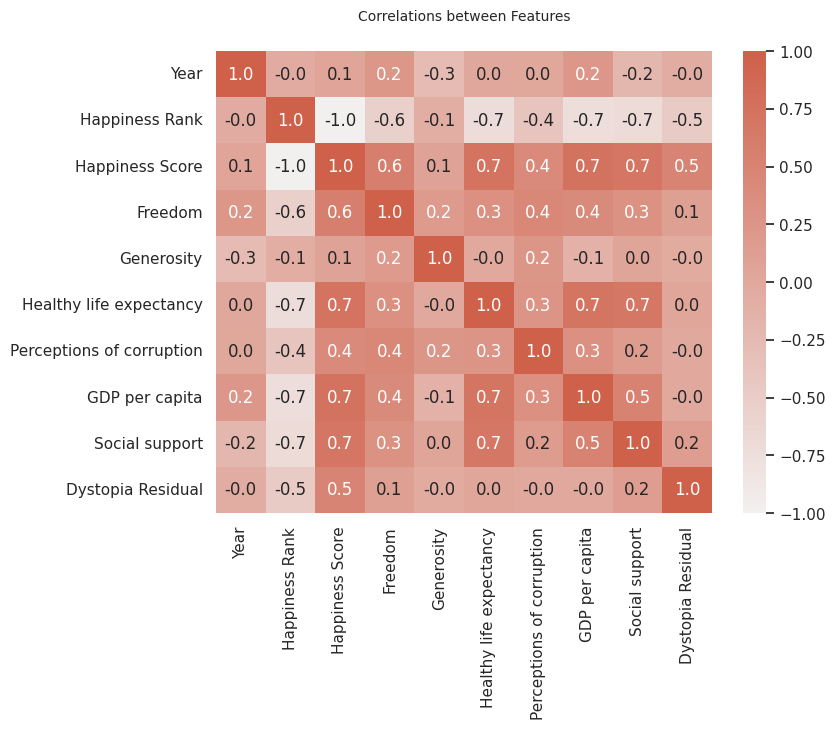

In [8]:
corr = df.corr() 

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette(palette='light:#cf604a', as_cmap=True), annot=True, fmt=".1f")
heatmap.set_title('Correlations between Features', fontdict={'fontsize':10}, pad=22)

High correlation between  features:
 - GPD & Health                     0.7
 - Health & Social Support          0.7 
 - GPD & Social Support             0.5


In [8]:
# Top correlated variables to Happiness Score
corr['Happiness Score'].abs().sort_values(ascending=False)

Happiness Score              1.000000
Happiness Rank               0.988845
GDP per capita               0.742521
Healthy life expectancy      0.727705
Social support               0.694263
Freedom                      0.564985
Dystopia Residual            0.495935
Perceptions of corruption    0.407864
Generosity                   0.091253
Year                         0.057607
Name: Happiness Score, dtype: float64

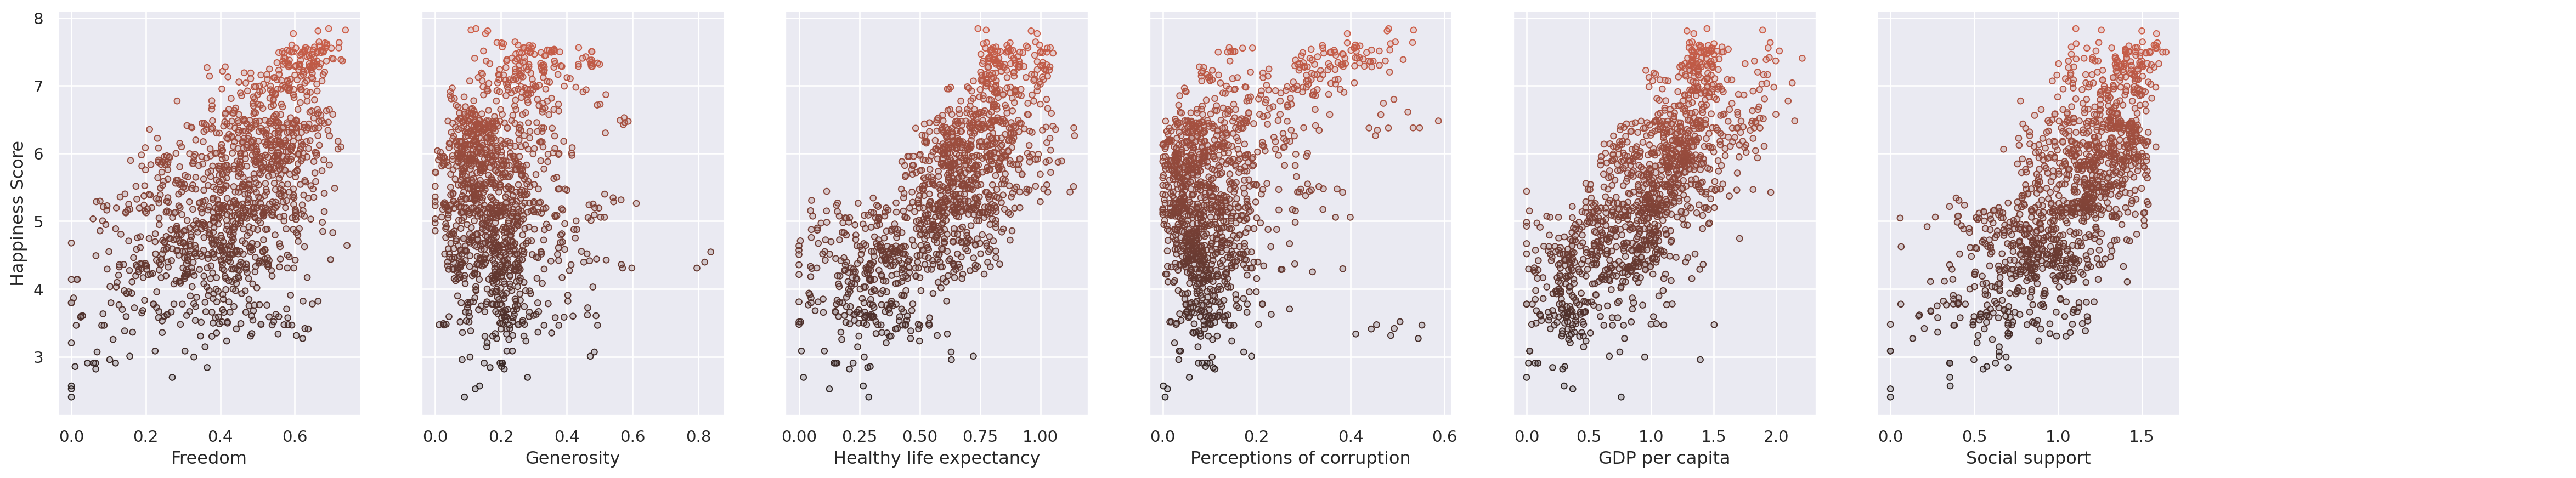

In [9]:
# f = Figure(figsize=(20, 10), dpi=100, layout="constrained")
# sf1, sf2 = f.subfigures(1, 2)

# Correlation between features
f = Figure(figsize=(26, 5), layout="constrained")
(
    so.Plot(df, y='Happiness Score', color='Happiness Score')
    .add(so.Dots())
    .pair(x=relevant_features)
    .scale(color='dark:#cf604a')
    .on(f)
)

In [10]:
# Pairplot
sns.pairplot(df)

### Top Countries

[Text(0.5, 1.0, 'Happiness Score Distribution')]

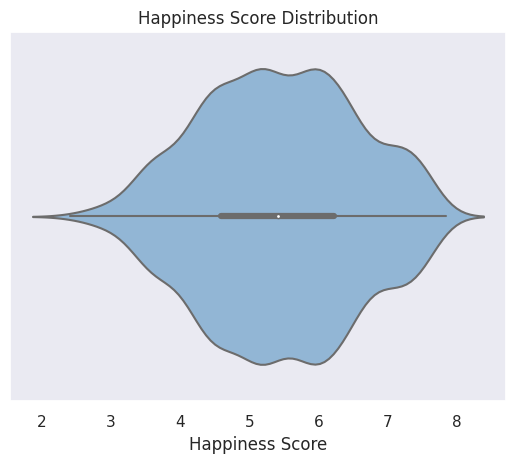

In [11]:
# How does the variable Hapinness Score behave?
sns.violinplot(x=df["Happiness Score"]).set(title="Happiness Score Distribution")

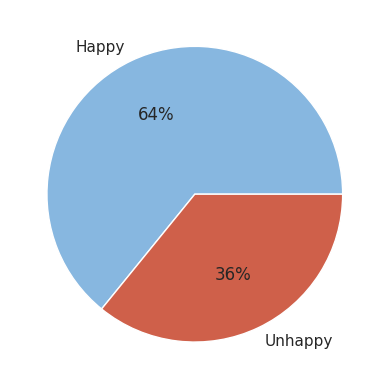

(789, 441, 1.7891156462585034)

In [19]:
nhappy = df[df['Happiness Score'] > 5].shape[0]
nunhappy = df[df['Happiness Score'] < 5].shape[0]

plt.pie([nhappy, nunhappy], labels=['Happy', 'Unhappy'], colors=['#87b7e0', '#cf604a'], autopct='%.0f%%')  
# displaying chart
plt.show()

nhappy,nunhappy, nhappy/nunhappy

#### Happiest/Unhappiest Country per Year

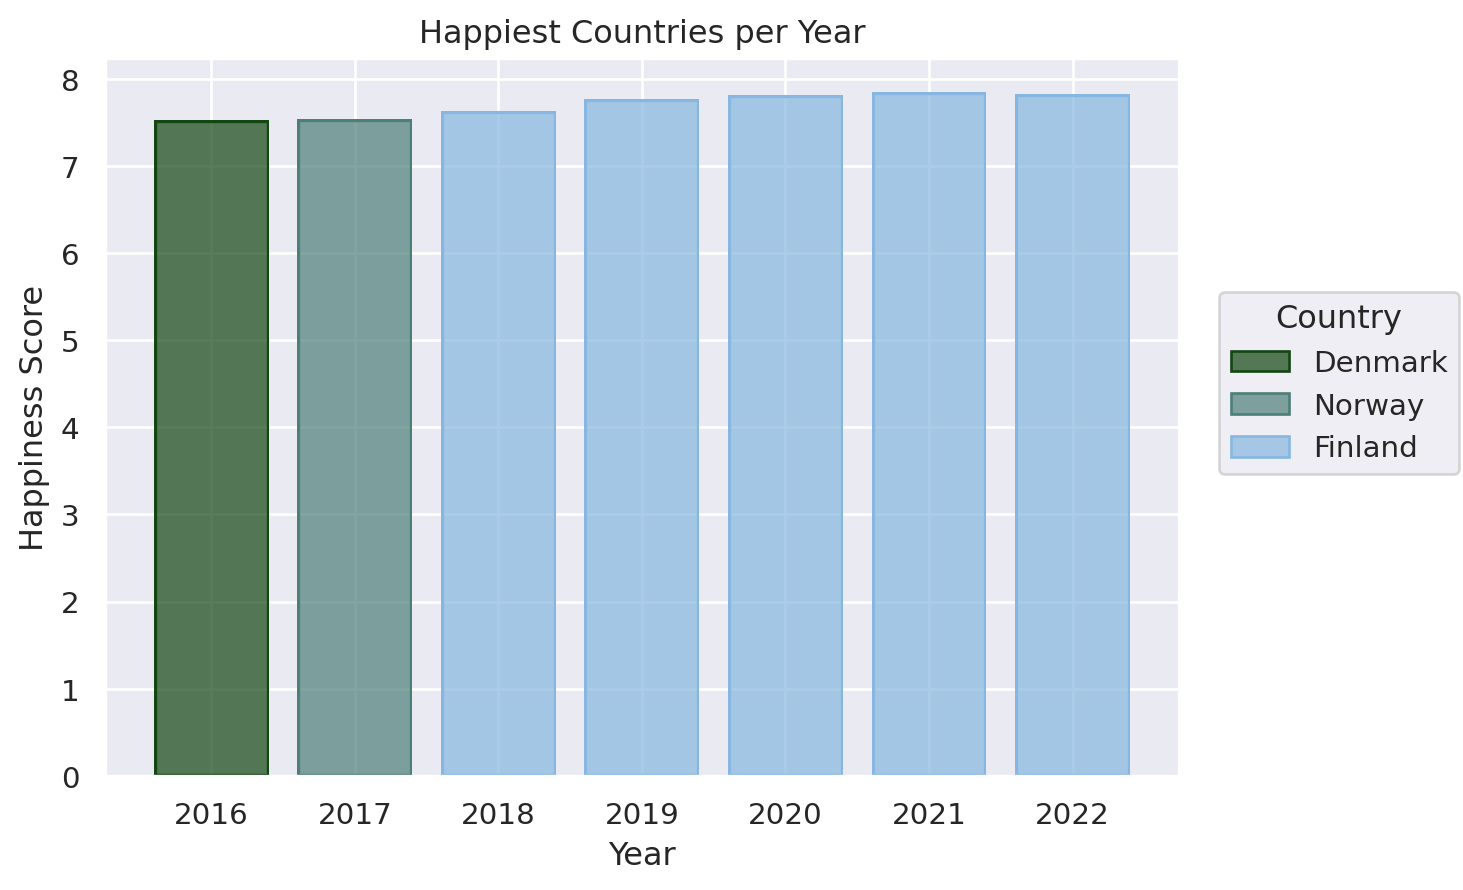

In [ ]:
happiest = df.sort_values(['Year', 'Happiness Rank']).groupby('Year').head(1).iloc[1:,:]

sns.set_style('white')
(
    so.Plot(data=happiest, x="Year", y="Happiness Score", color='Country')  
    .add(so.Bar()) 
    .scale(color=('#134611','#87b7e0')) 
    .label(title="Happiest Countries per Year")
)

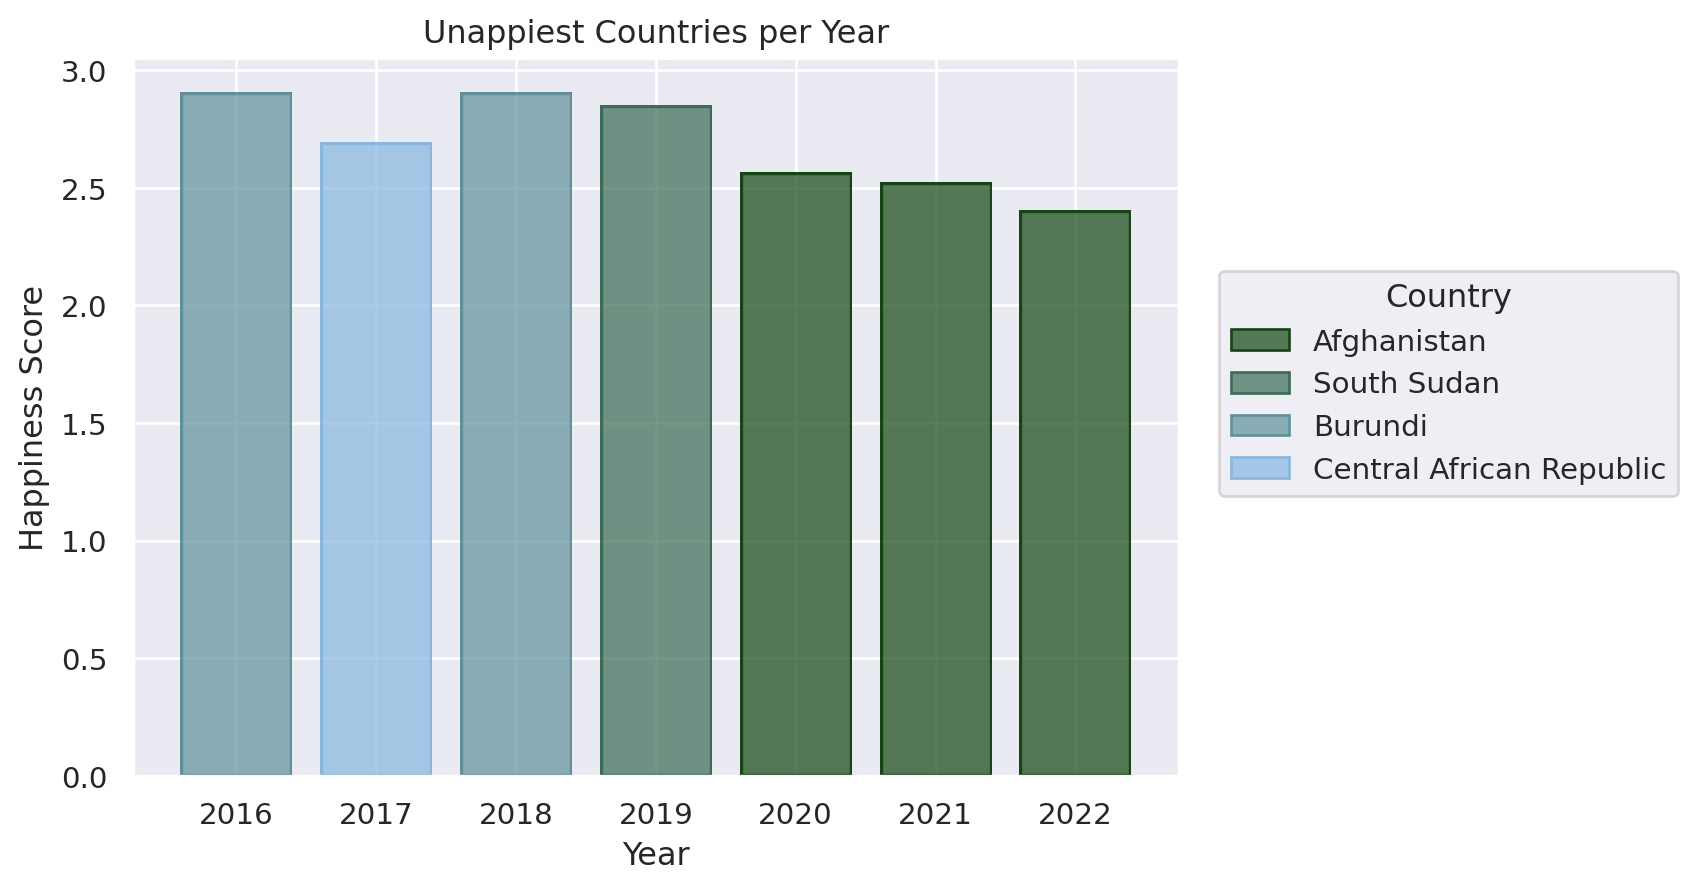

In [ ]:
unhappiest = df.sort_values(['Year', 'Happiness Rank'], ascending=False).groupby('Year').head(1).iloc[:-1,:]

(
    so.Plot(data=unhappiest, x="Year", y="Happiness Score", color='Country') 
    .add(so.Bar())
    .scale(color=('#cf604a','#4C191B'))
    .label(title="Unappiest Countries per Year") 
)

#### Top/Bottom 10 by Rank

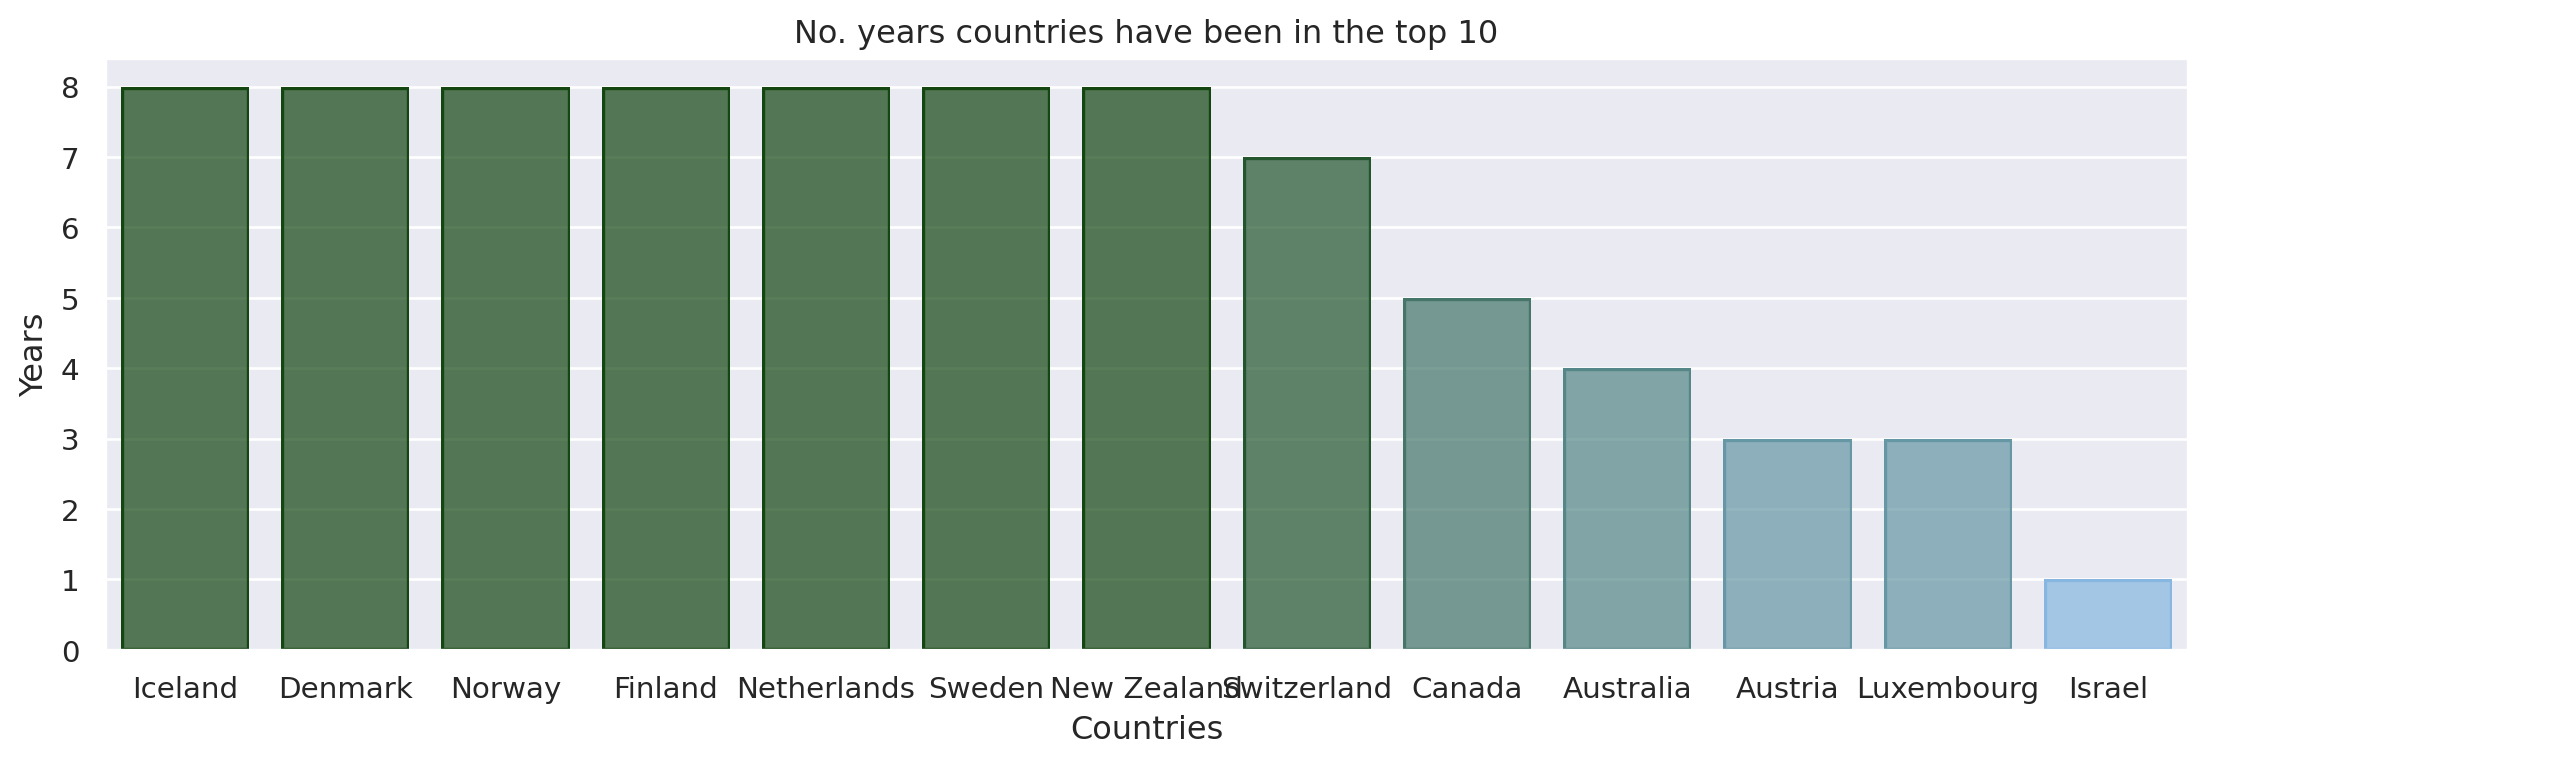

In [ ]:
# Countries in the Top 10 podium, 8 years 
top10_eachyear = df.sort_values(['Year', 'Happiness Rank']).groupby('Year').head(10).copy() # Get top 10 for each year
top10_eachyear = top10_eachyear.iloc[1: , :] # remove first std row

top10_eachyear = top10_eachyear.Country.value_counts().rename_axis('Countries').reset_index(name='Years')

f = Figure(figsize=(14, 4), layout="constrained")
(
    so.Plot(data=top10_eachyear, x="Countries", y="Years", color="Years") 
    .add(so.Bar())
    .scale(color=('#87b7e0','#134611'))
    .label(title="No. years countries have been in the top 10") 
    .on(f)
)

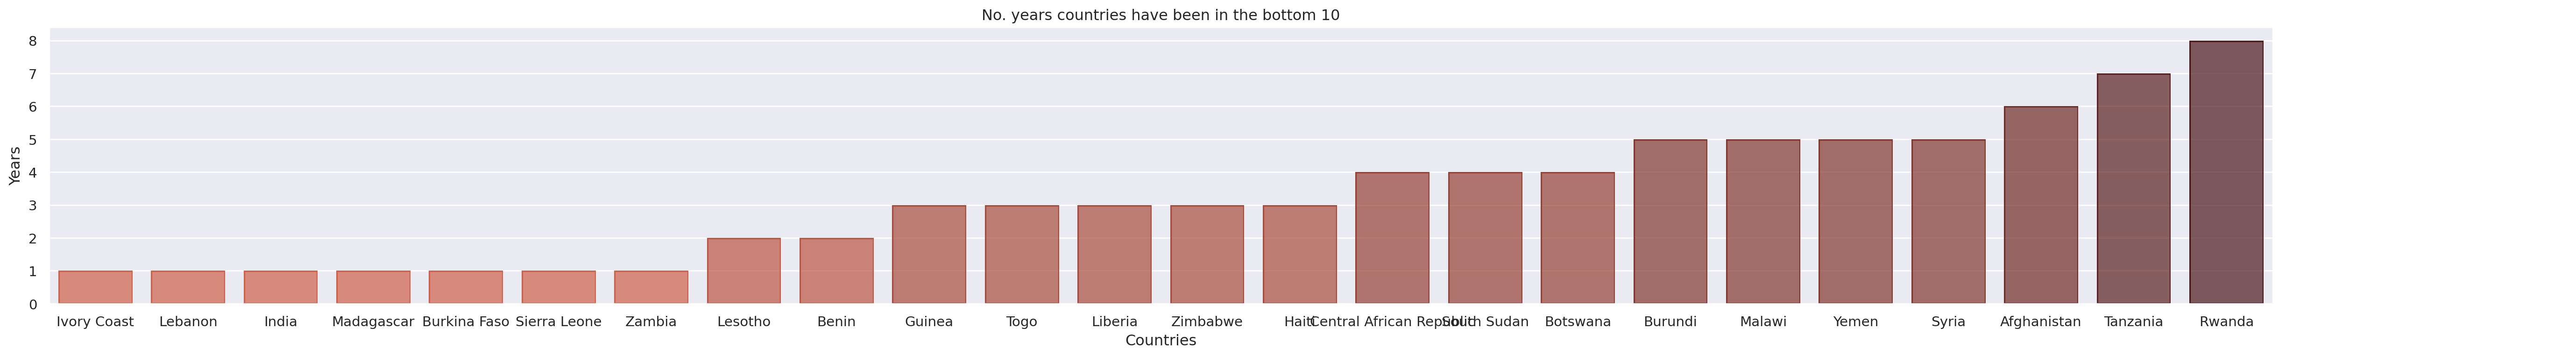

In [ ]:
# Bottom 10 countries through out the 8 years 
bottom10_eachyear = df.sort_values(['Year', 'Happiness Rank'], ascending=False).groupby('Year').head(10) # Get bottom 10 for each year
bottom10_eachyear = bottom10_eachyear.iloc[:-1 , :] # remove first std row

bottom10_eachyear = bottom10_eachyear.Country.value_counts().rename_axis('Countries').reset_index(name='Years').sort_values('Years')

f = Figure(figsize=(32, 4), layout="constrained")
(
    so.Plot(data=bottom10_eachyear, x="Countries", y="Years", color="Years") 
    .add(so.Bar())
    .scale(color=('#cf604a','#4C191B'))
    .label(title="No. years countries have been in the bottom 10") 
    .on(f)
)

#### Top/Bottom 10 Percentile by Score

In [ ]:
# Count happy/unhappy countries 
# Lets define as happy/unhappy countries those who have mantain above/bellow threshole over the last 4 years.

# It is known that Happiness Score domain goes from 0 to 10, lets see min and max values in data
df['Happiness Score'].min(), df['Happiness Score'].max(), df['Happiness Score'].quantile(0.1), df['Happiness Score'].quantile(0.9)

(2.404, 7.842, 3.9357000978469827, 6.985800003051759)

As we can see, there is not one country that can be considered Uthopic or Dystopic, for there is no country with more than 90% score (9-10), or less than 20% (0-1)

In [ ]:
# Define thresholes
min_threshole = df['Happiness Score'].quantile(0.1)
max_threshole = df['Happiness Score'].quantile(0.9)

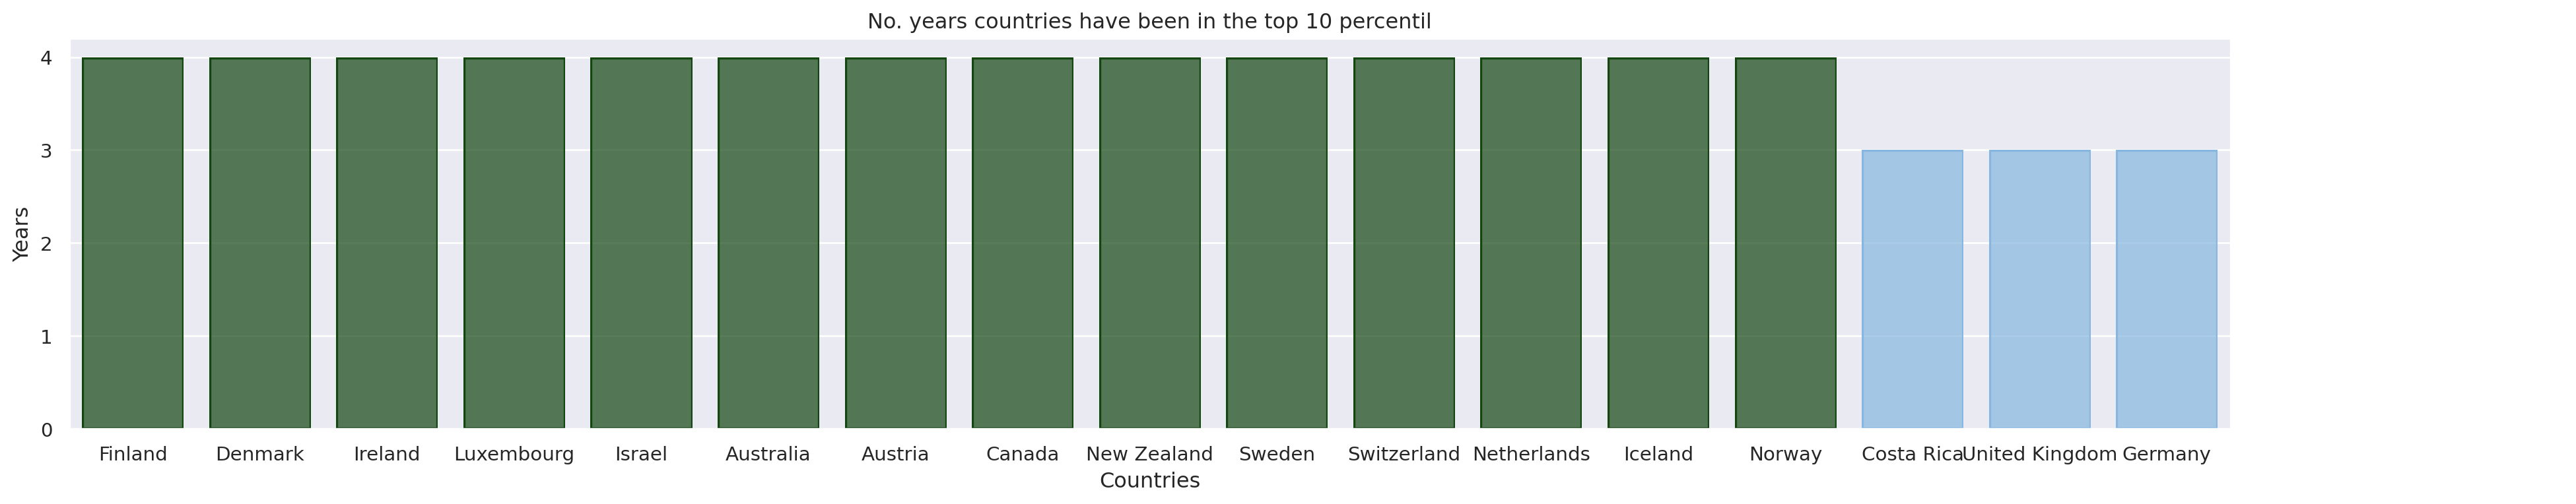

In [ ]:
happy_df = df[(df['Happiness Score'] > max_threshole) & (df['Year'] > 2018)]
happy_df = happy_df.Country.value_counts().rename_axis('Countries').reset_index(name='Years')

f = Figure(figsize=(22, 4), layout="constrained")
(
    so.Plot(data=happy_df, x="Countries", y="Years", color="Years") 
    .add(so.Bar())
    .scale(color=('#87b7e0','#134611'), y=so.Continuous().tick(every=1))
    .label(title="No. years countries have been in the top 10 percentil") 
    .on(f)
)

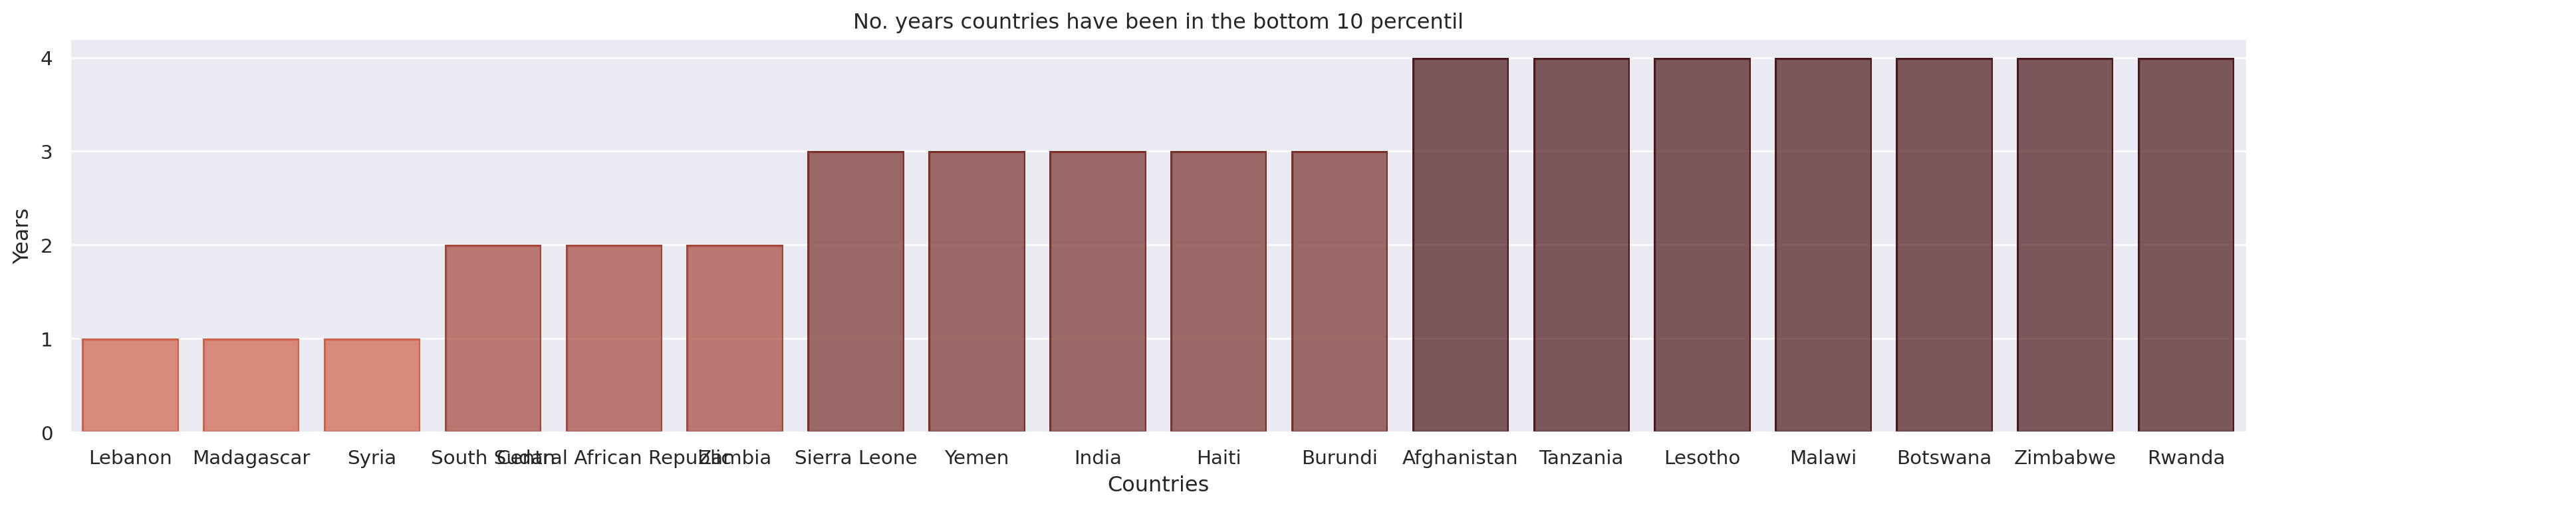

In [ ]:
unhappy_df = df[(df['Happiness Score'] < min_threshole) & (df['Year'] > 2018)]
unhappy_df = unhappy_df.Country.value_counts().rename_axis('Countries').reset_index(name='Years').sort_values('Years')

f = Figure(figsize=(22, 4), layout="constrained")
(
    so.Plot(data=unhappy_df, x="Countries", y="Years", color="Years") 
    .add(so.Bar())
    .scale(color=('#cf604a','#4C191B'), y=so.Continuous().tick(every=1))
    .label(title="No. years countries have been in the bottom 10 percentil") 
    .on(f)
)

#### Best Countries by Category in average

In [ ]:
# Best performing country in each category: calculated by 

freedom = df.groupby('Country').mean(numeric_only=True).sort_values('Freedom', ascending=False).head(1).rename({'Freedom' : 'Values'}, axis=1)[['Values']].assign(Category='Freedom')
generosity = df.groupby('Country').mean(numeric_only=True).sort_values('Generosity', ascending=False).head(1).rename({'Generosity' : 'Values'}, axis=1)[['Values']].assign(Category='Generosity')
health = df.groupby('Country').mean(numeric_only=True).sort_values('Healthy life expectancy', ascending=False).head(1).rename({'Healthy life expectancy' : 'Values'}, axis=1)[['Values']].assign(Category='Health')
corruption = df.groupby('Country').mean(numeric_only=True).sort_values('Perceptions of corruption', ascending=False).head(1).rename({'Perceptions of corruption' : 'Values'}, axis=1)[['Values']].assign(Category='Corruption Perception')
gpd = df.groupby('Country').mean(numeric_only=True).sort_values('GDP per capita', ascending=False).head(1).rename({'GDP per capita' : 'Values'}, axis=1)[['Values']].assign(Category='GDP')
social = df.groupby('Country').mean(numeric_only=True).sort_values('Social support', ascending=False).head(1).rename({'Social support' : 'Values'}, axis=1)[['Values']].assign(Category='Social Support')

top = pd.concat([freedom, generosity, health, corruption, gpd, social]).rename_axis('Countries').reset_index()
top

Countries    Values               Category
0                 Uzbekistan  0.675651                Freedom
1                    Myanmar  0.644935             Generosity
2  Hong Kong S.A.R. of China  1.004093                 Health
3                  Singapore  0.500430  Corruption Perception
4                      Qatar  1.743691                    GDP
5                   Suriname  1.466265         Social Support

In [ ]:
# Reduce length of countries' names for plot
top.loc[[2],'Countries'] = 'Hong Kong'

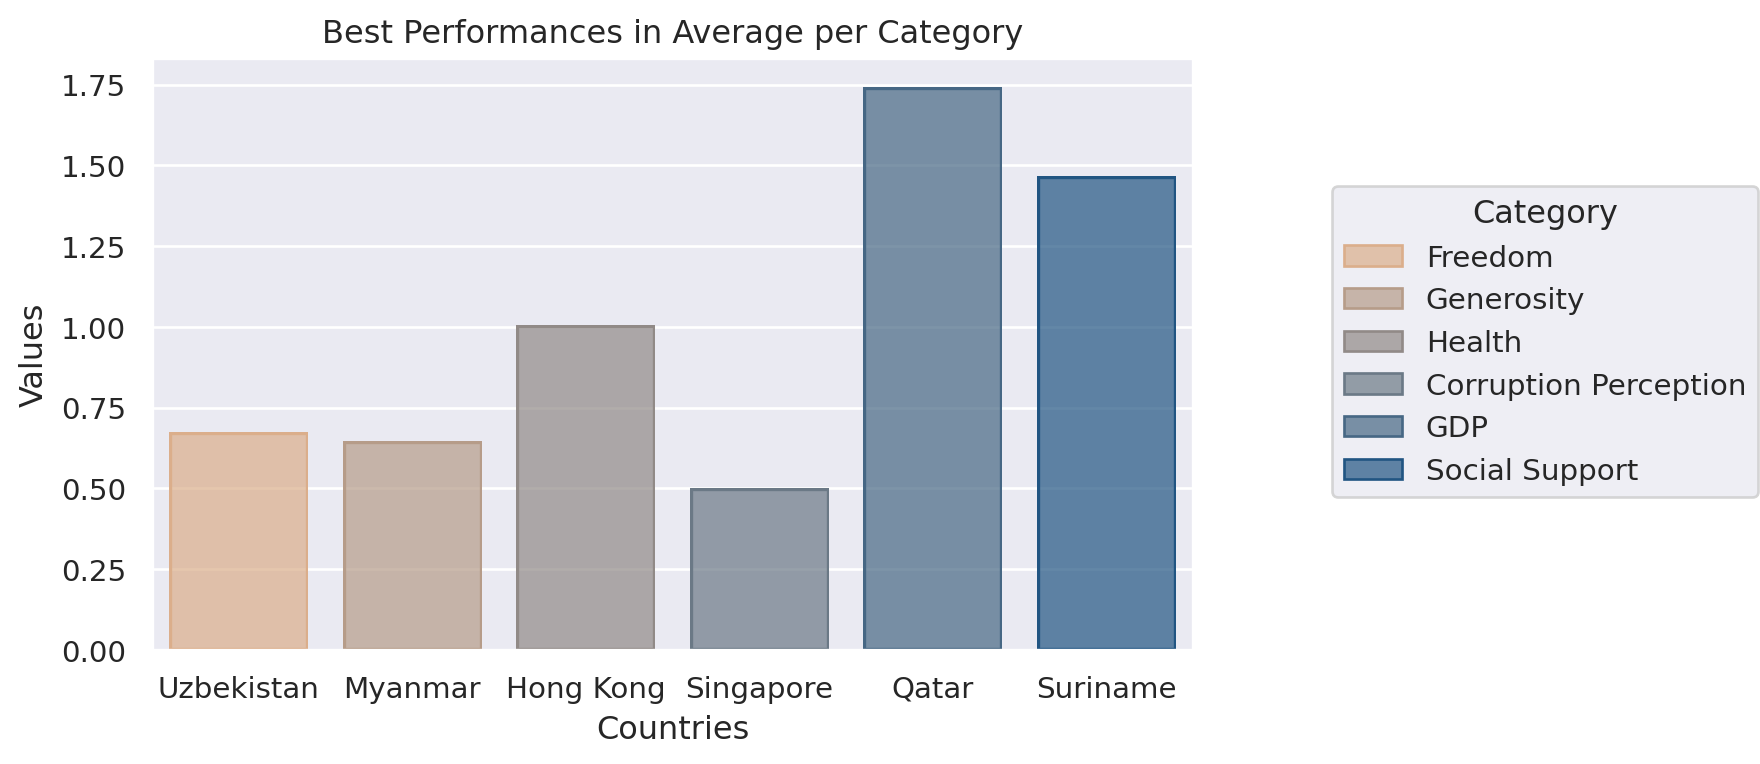

In [ ]:
# Best performances per Category
f = Figure(figsize=(7, 4), layout="constrained")
(
    so.Plot(data=top, x="Countries", y="Values", color="Category") 
    .add(so.Bar())
    .scale(color=('#DBAE8B', '#215582'))
    # .scale(color=('#DBAE8B','#845633'))
    .label(title="Best Performances in Average per Category") 
    .on(f)
)

In [ ]:
# Best performing country in each category: calculated by 

#  Group by Country, calculate the mean of all 6 variables in all years, sort by the category, take the first, now rename the category so all have the same name to later concat, and assign a column category
freedom = df.groupby('Country').mean(numeric_only=True).sort_values('Freedom').head(1).rename({'Freedom' : 'Values'}, axis=1)[['Values']].assign(Category='Freedom')
generosity = df.groupby('Country').mean(numeric_only=True).sort_values('Generosity').head(1).rename({'Generosity' : 'Values'}, axis=1)[['Values']].assign(Category='Generosity')
health = df.groupby('Country').mean(numeric_only=True).sort_values('Healthy life expectancy').head(1).rename({'Healthy life expectancy' : 'Values'}, axis=1)[['Values']].assign(Category='Health')
corruption = df.groupby('Country').mean(numeric_only=True).sort_values('Perceptions of corruption').head(1).rename({'Perceptions of corruption' : 'Values'}, axis=1)[['Values']].assign(Category='Corruption Perception')
gpd = df.groupby('Country').mean(numeric_only=True).sort_values('GDP per capita').head(1).rename({'GDP per capita' : 'Values'}, axis=1)[['Values']].assign(Category='GDP')
social = df.groupby('Country').mean(numeric_only=True).sort_values('Social support').head(1).rename({'Social support' : 'Values'}, axis=1)[['Values']].assign(Category='Social Support')

bottom = pd.concat([freedom, generosity, health, corruption, gpd, social]).rename_axis('Countries').reset_index()
bottom

Countries    Values               Category
0                    Angola  0.027433                Freedom
1                    Greece  0.001875             Generosity
2  Central African Republic  0.040153                 Health
3    Bosnia and Herzegovina  0.002555  Corruption Perception
4                   Somalia  0.005661                    GDP
5  Central African Republic  0.119040         Social Support

In [ ]:
# Reduce length of countries' names for plot
bottom.loc[[2,5],'Countries'] = 'Central Africa'
bottom.loc[3,'Countries'] = 'Bosnia & Herz'

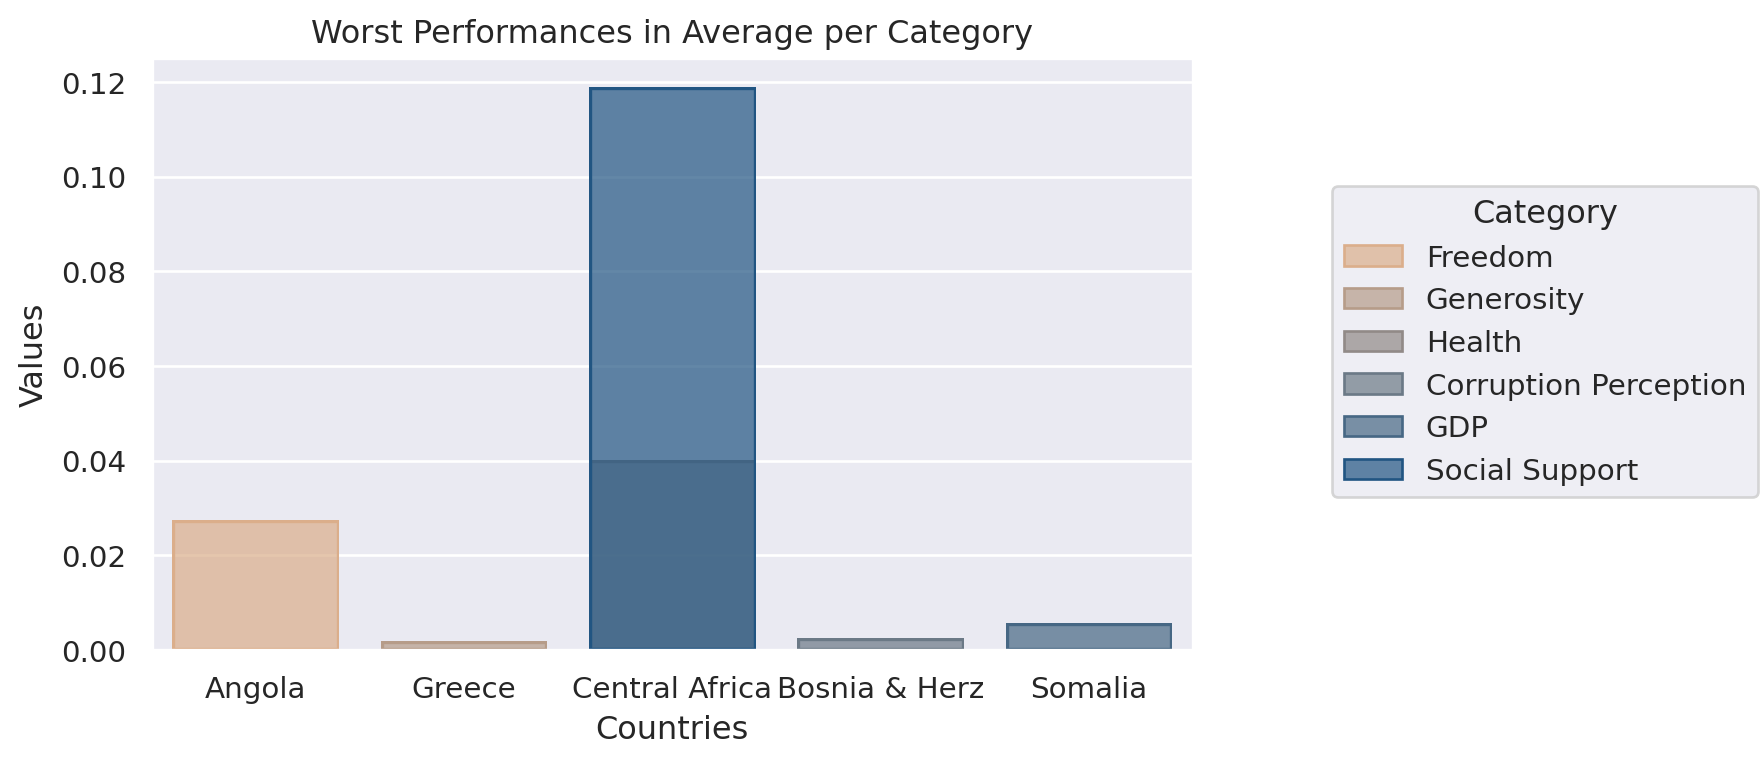

In [ ]:
# Worst performing country per category
f = Figure(figsize=(7, 4), layout="constrained")
(
    so.Plot(data=bottom, x="Countries", y="Values", color="Category") 
    .add(so.Bar())
    .scale(color=('#DBAE8B', '#215582'))
    # .scale(color=('#DBAE8B','#845633'))
    .label(title="Worst Performances in Average per Category") 
    .on(f)
)

Interesting to notice that Central African Republic is twice in this list.

### Happiness Distribution Over the Years

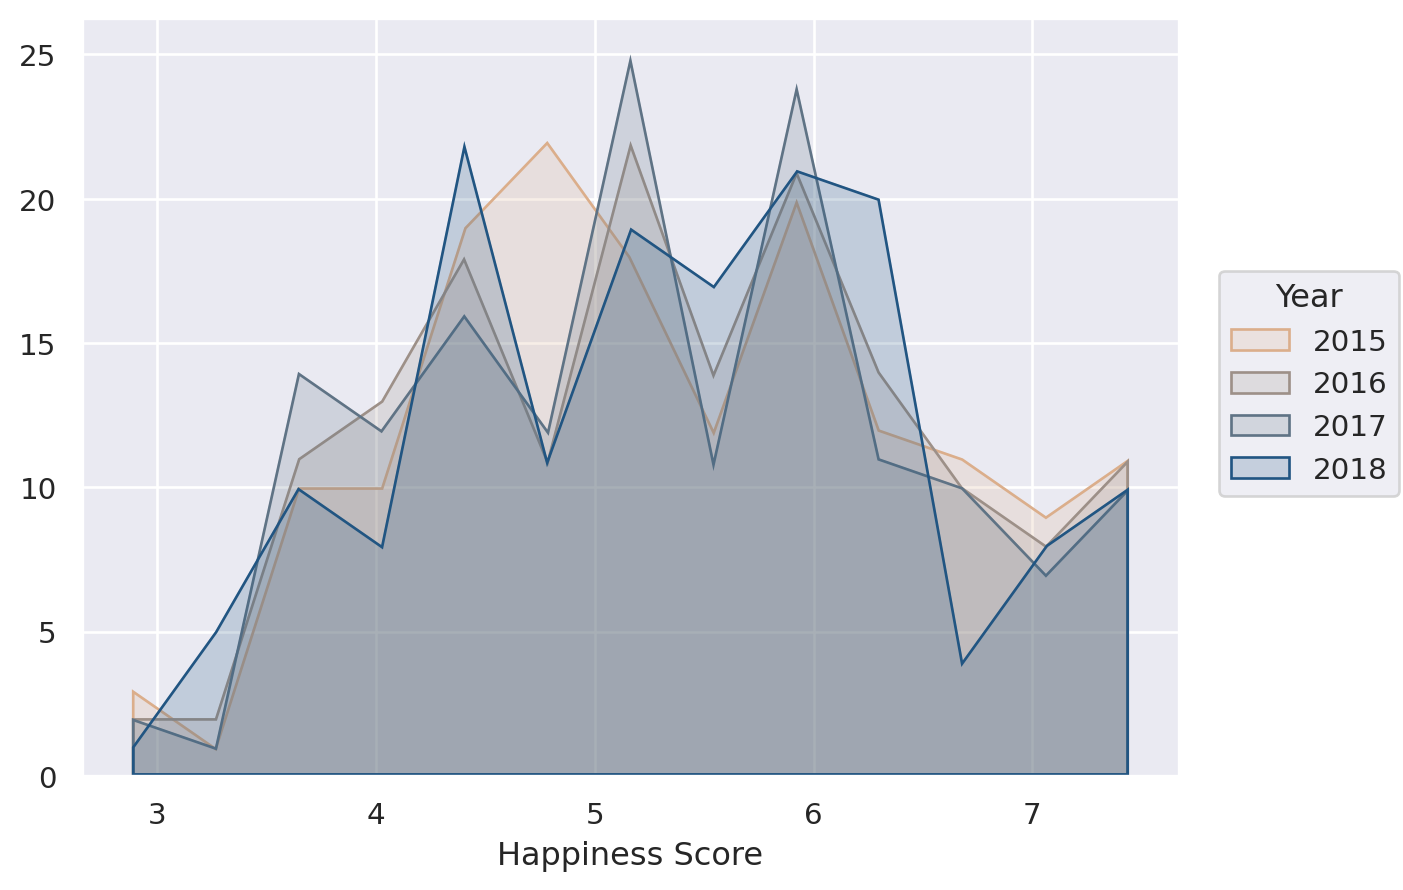

In [ ]:
(
    so.Plot(data=df[df.Year < 2019], x="Happiness Score", color="Year")
    .add(so.Area(), so.Hist())
    .scale(color=('#DBAE8B', '#215582'))
)

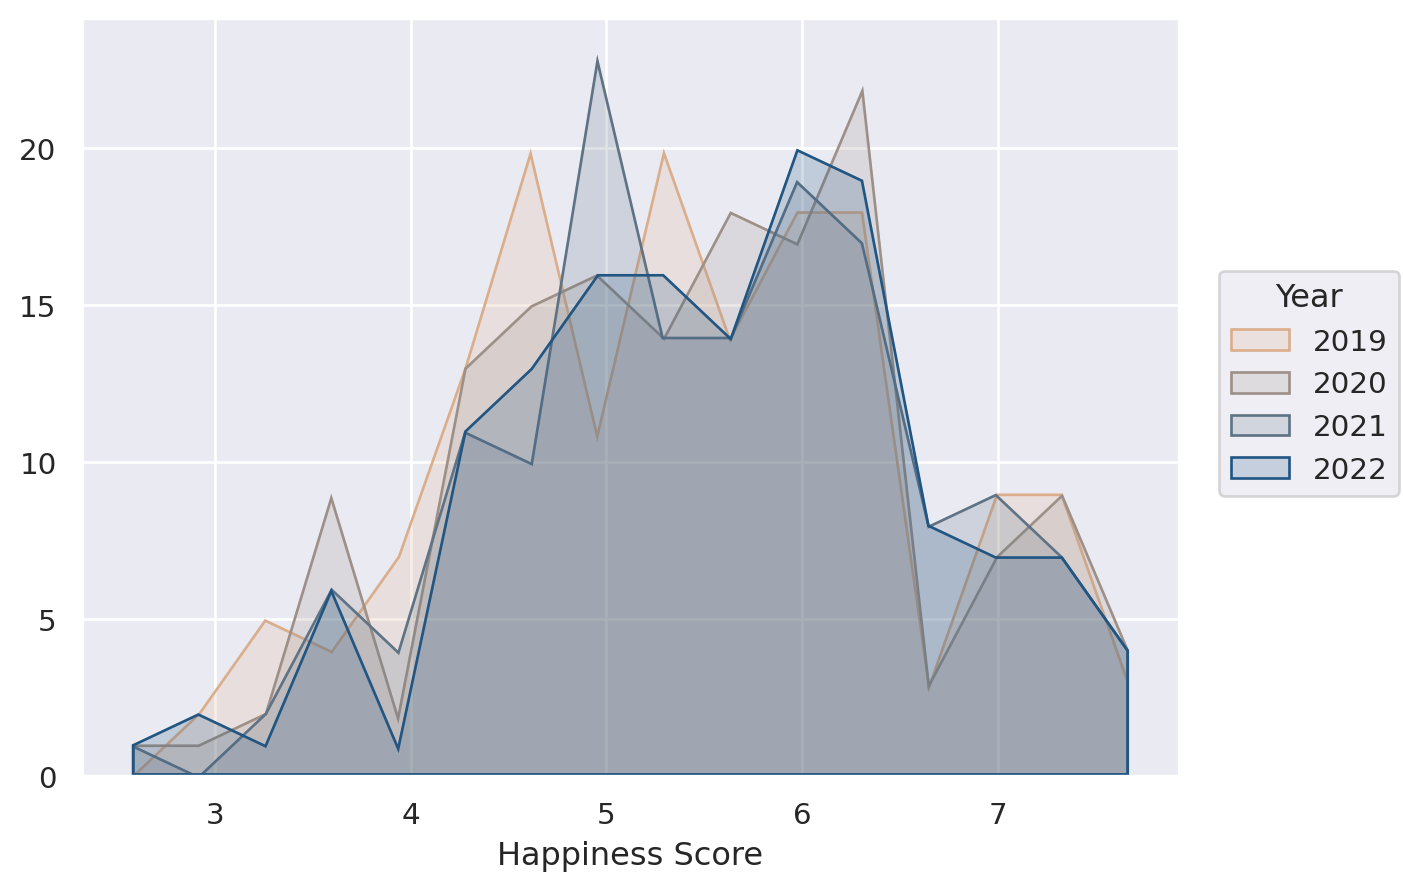

In [ ]:
(
    so.Plot(data=df[df.Year > 2018], x="Happiness Score", color="Year")
    .add(so.Area(), so.Hist())
    .scale(color=('#DBAE8B', '#215582'))
)

In [ ]:
# Not much difference can be appreciated in the plots, lets see quantitive values.
df.groupby('Year').mean()['Happiness Score']

/tmp/ipykernel_18971/3902848278.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').mean()['Happiness Score']


Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
2020    5.473240
2021    5.532839
2022    5.553575
Name: Happiness Score, dtype: float64

It stays pretty much the same through out the years, although it has been increasing over the past years.

### Happiness Scores and Features across Regions


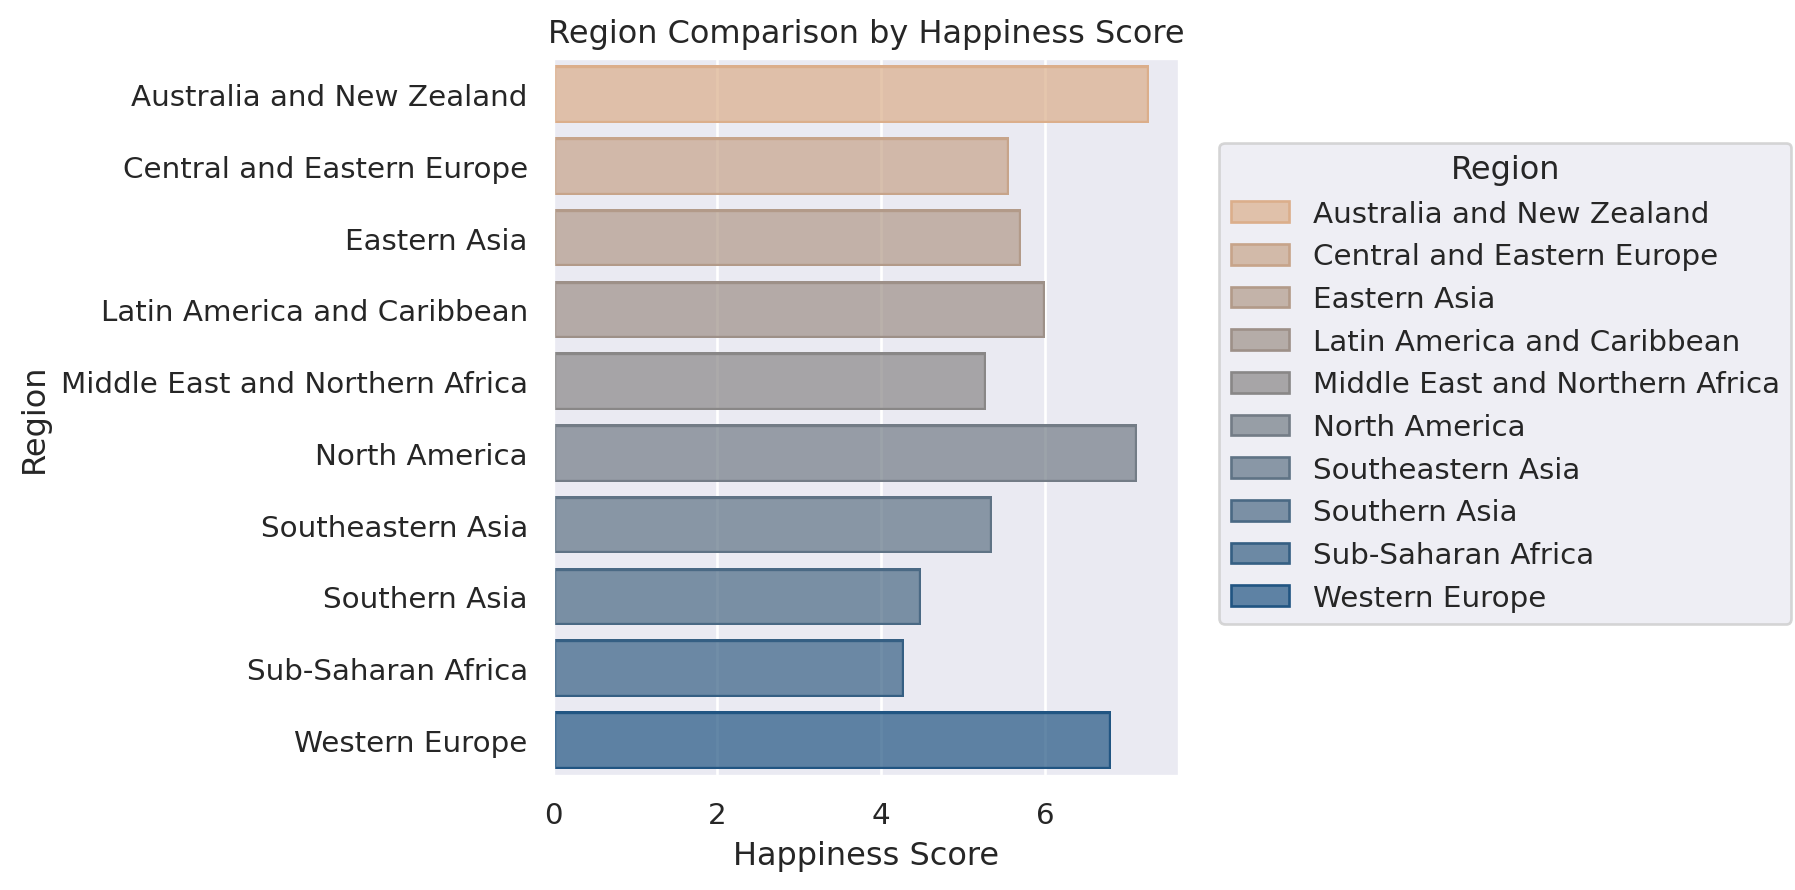

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='Happiness Score', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by Happiness Score", legend="")
)

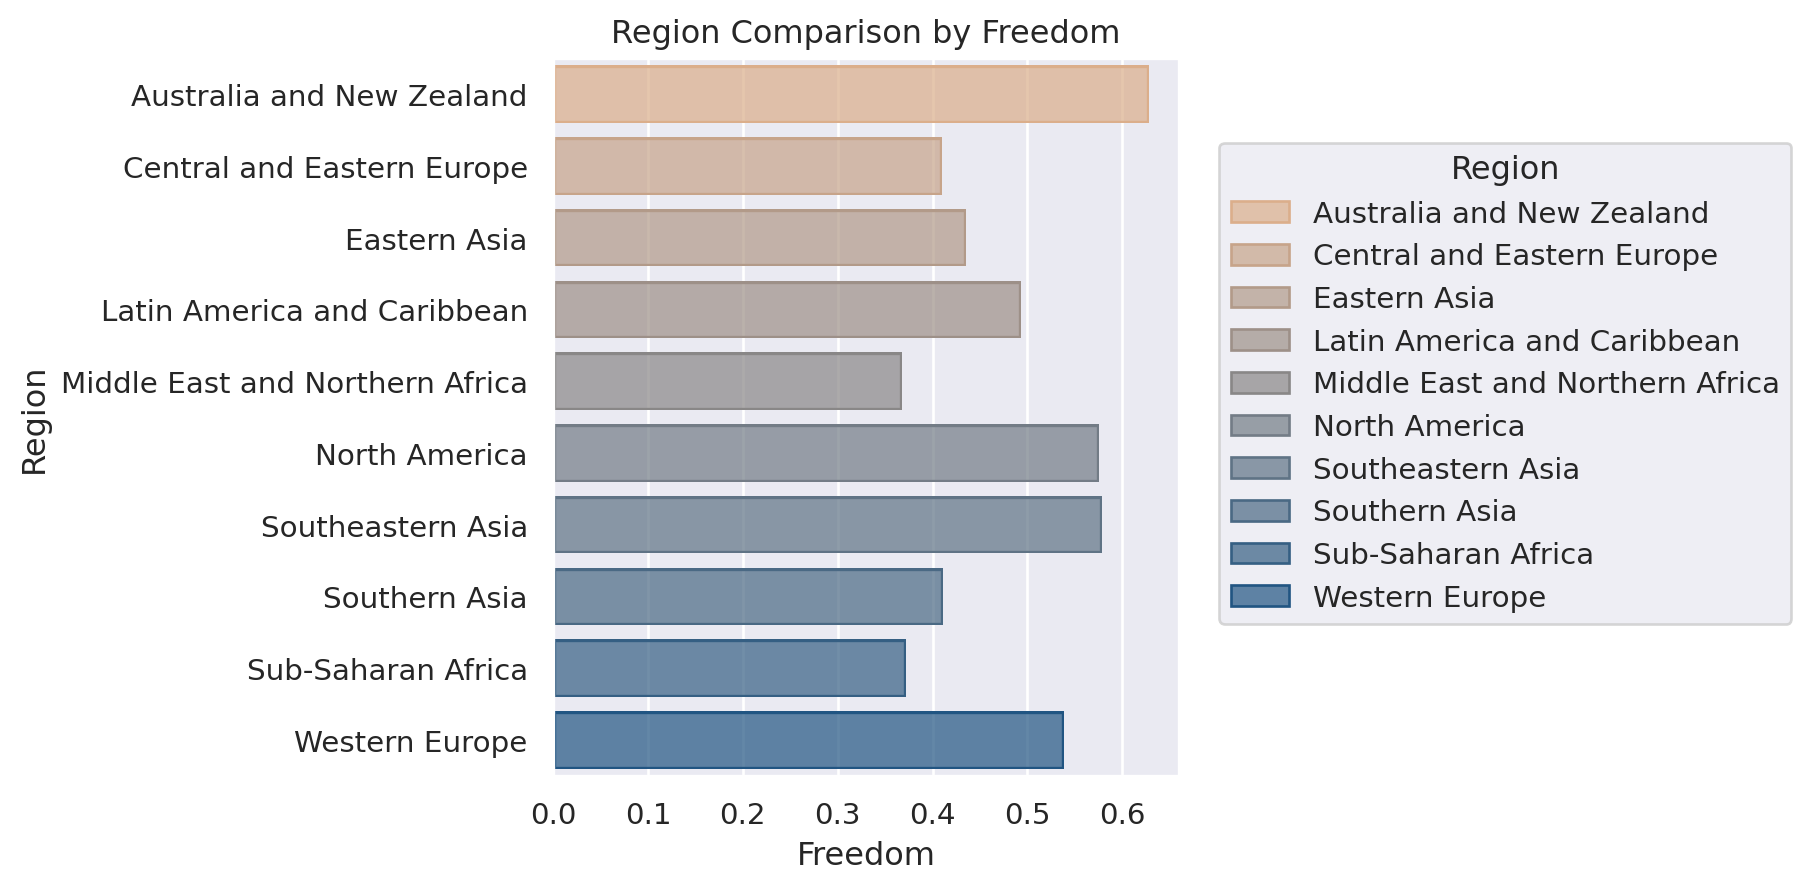

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='Freedom', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by Freedom")
)

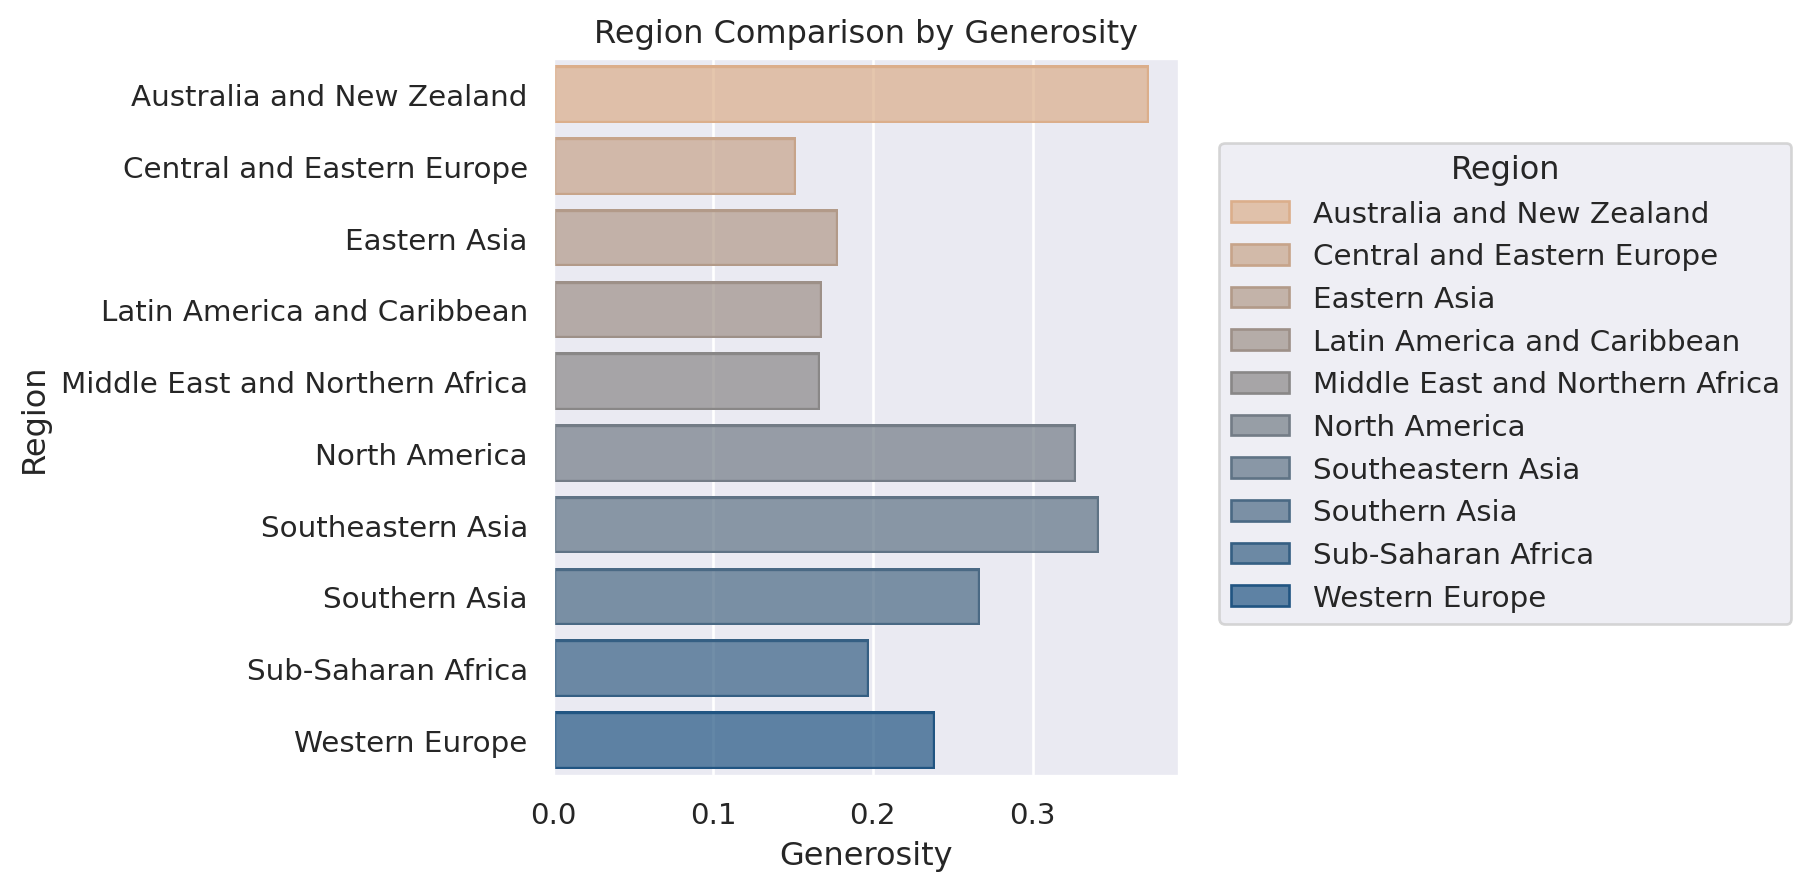

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='Generosity', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by Generosity")
)

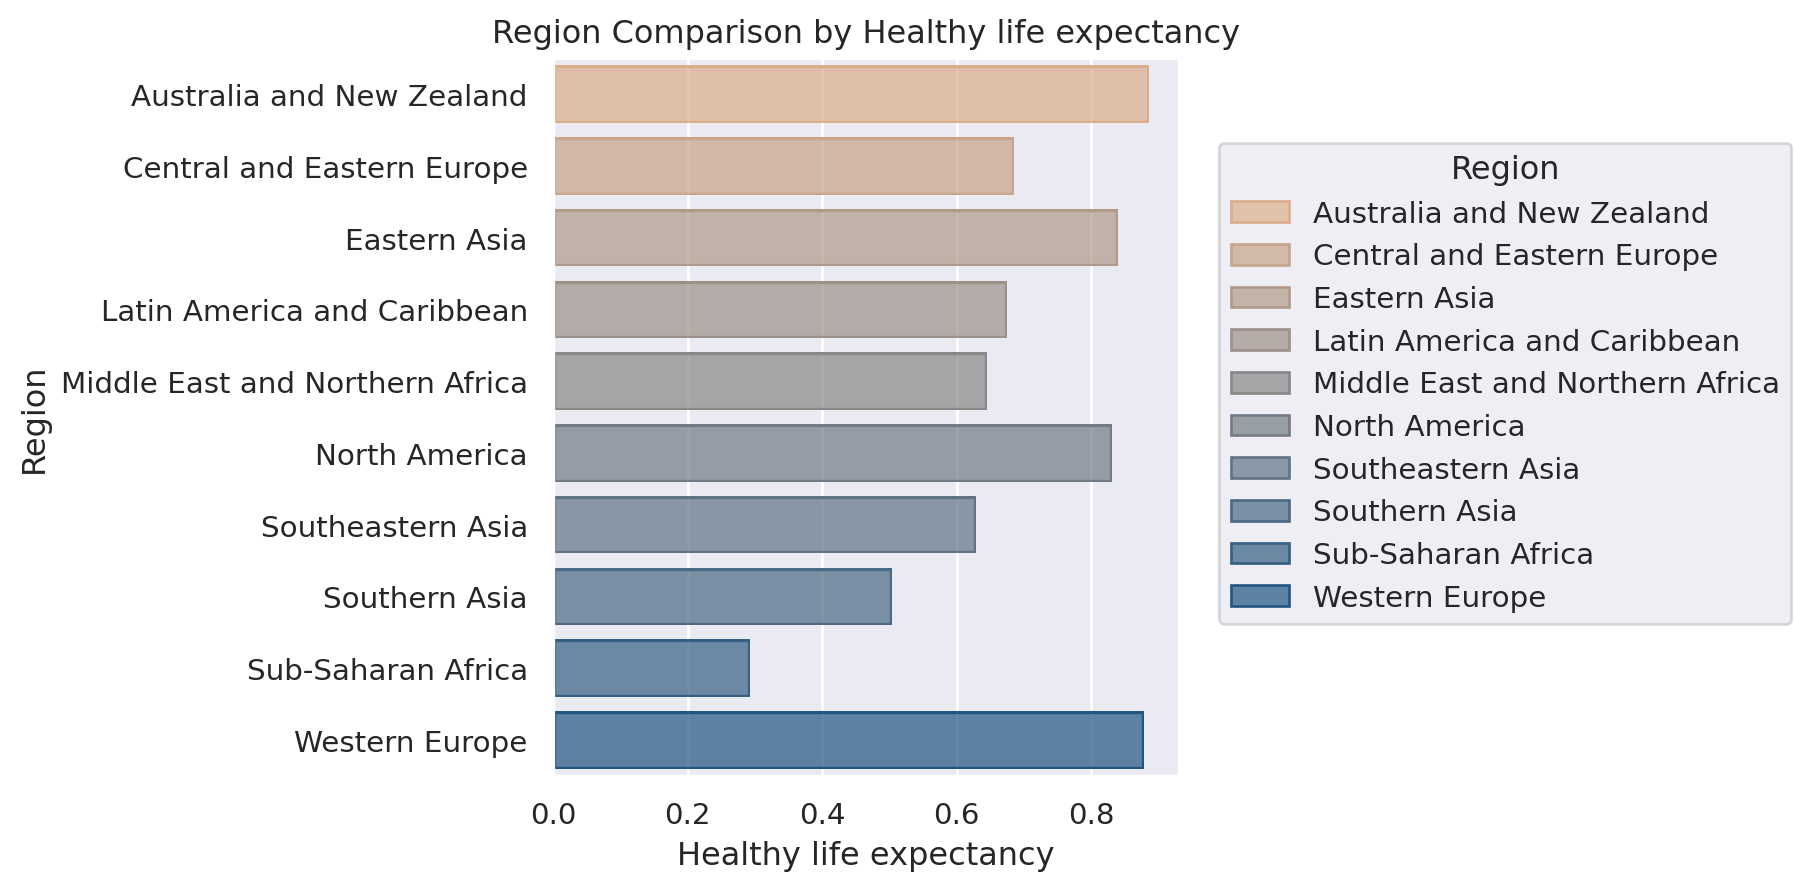

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='Healthy life expectancy', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by Healthy life expectancy")
)

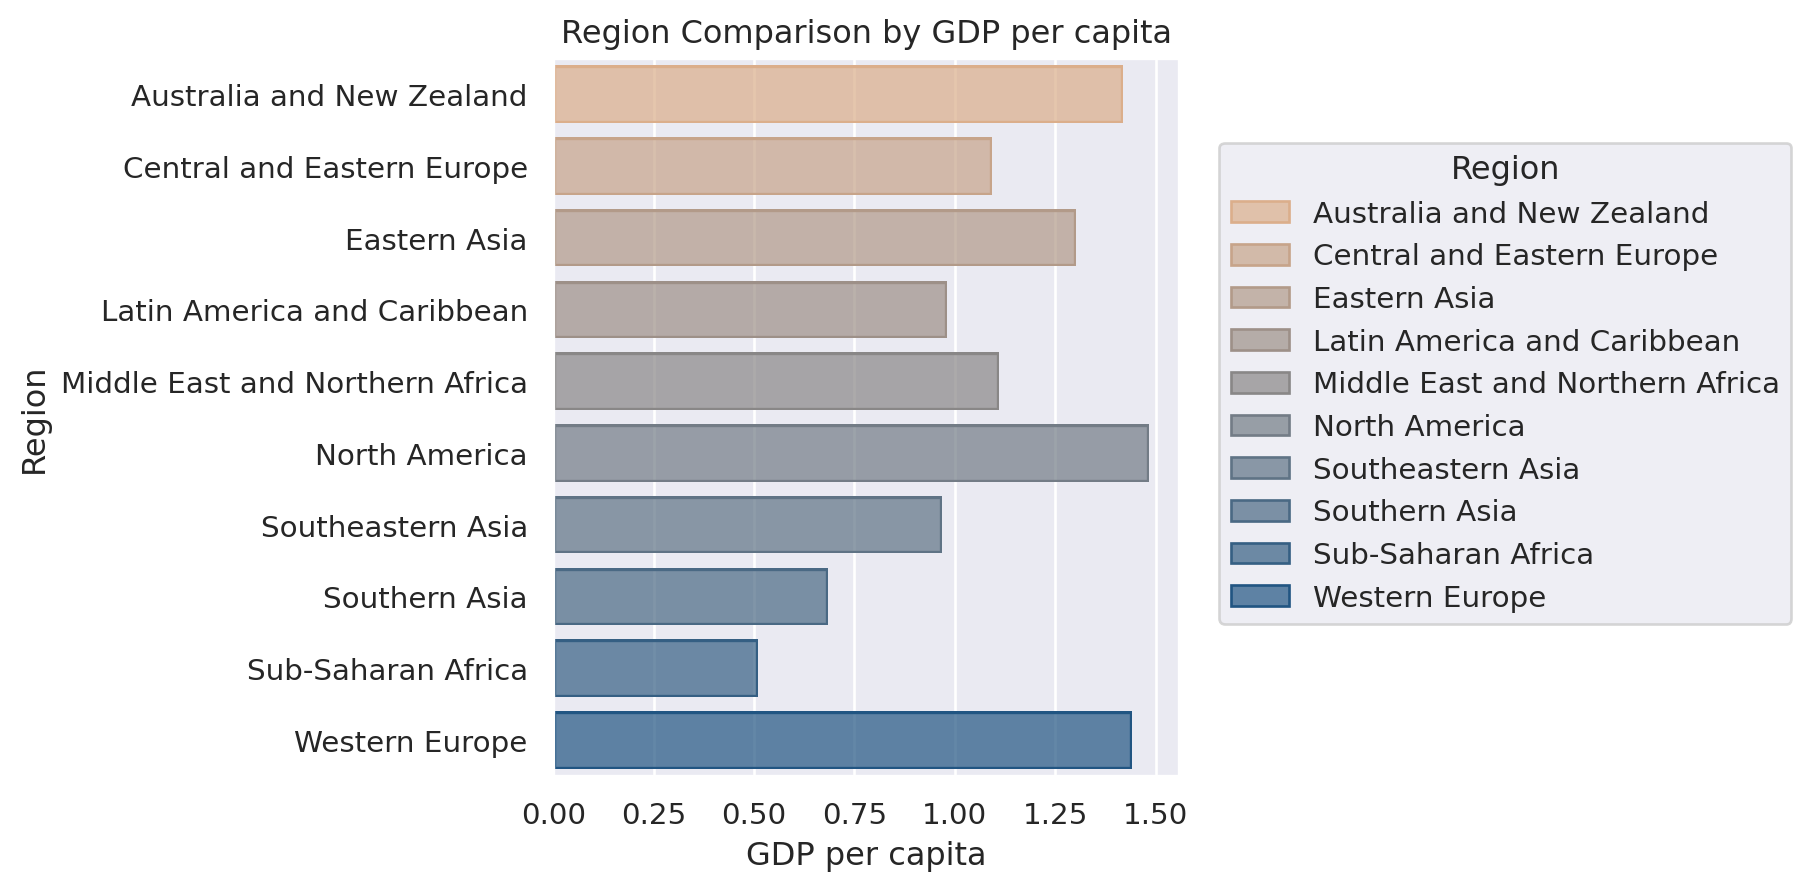

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='GDP per capita', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by GDP per capita")
)

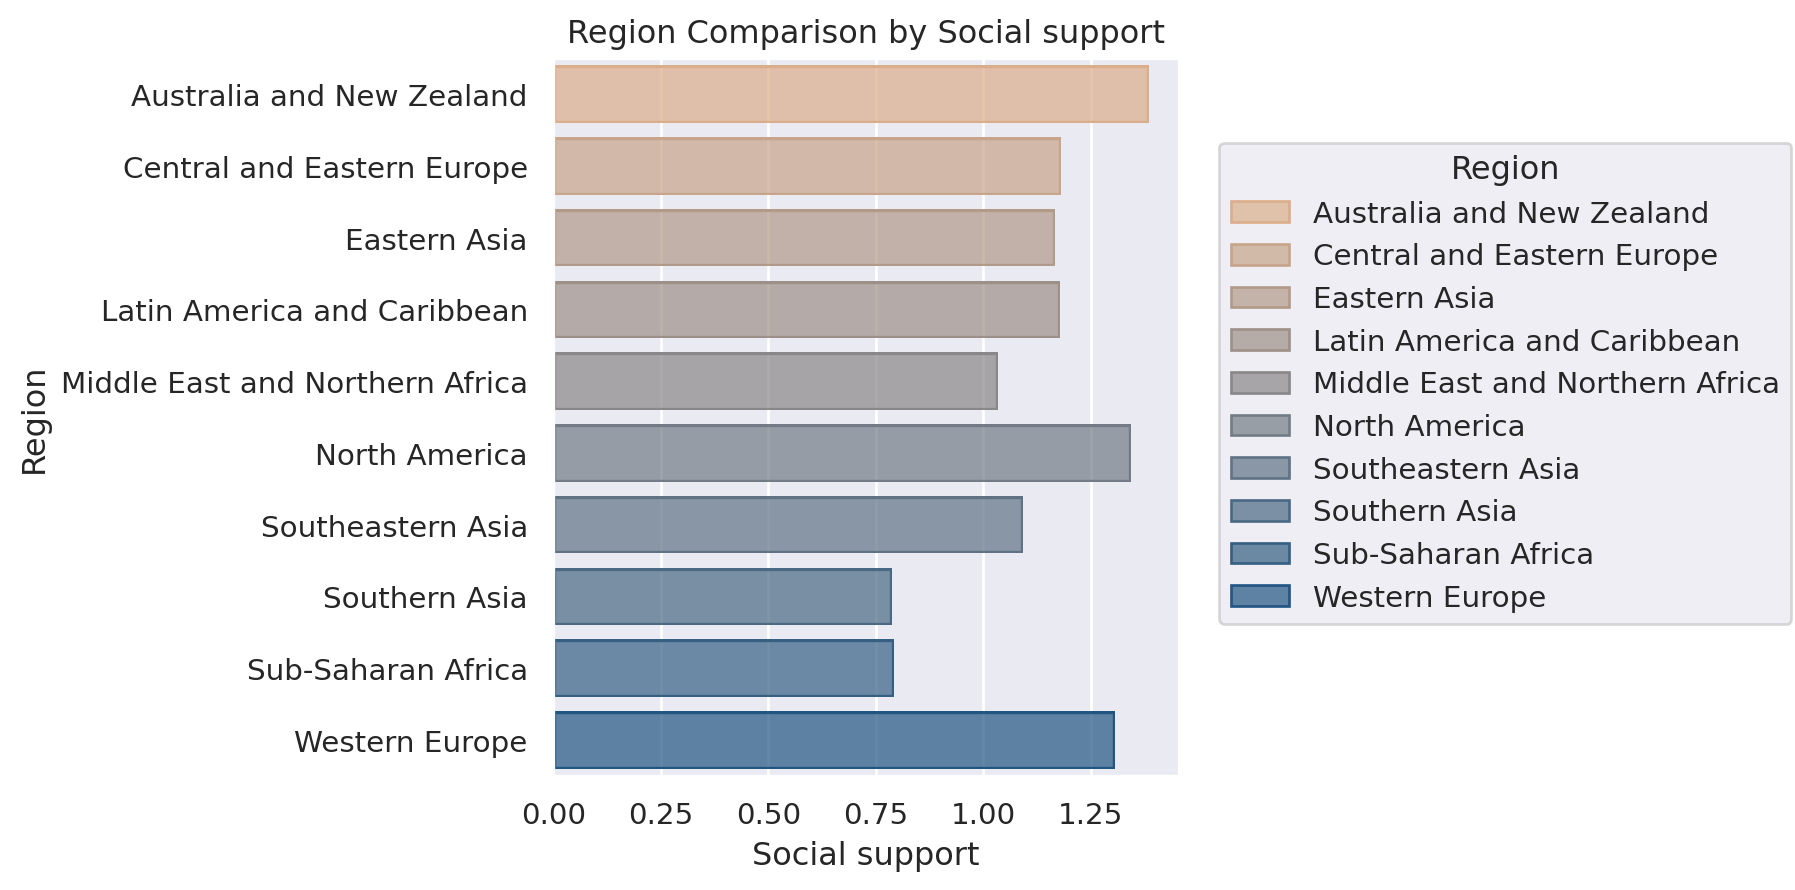

In [ ]:
(
    so.Plot(df.sort_values('Region'), x='Social support', y='Region', color='Region')
    .add(so.Bar(), so.Agg())
    .scale(color=('#DBAE8B', '#215582'))
    .label(title="Region Comparison by Social support")
)

## Summary

**Which variables have higher impact in the Happiness Score?**
- GDP per capita               0.742521
- Healthy life expectancy      0.727705
- Social support               0.623557

**Which countries have remained in the top 10 and bottom 10 through out the last 8 years?**

Top
- Finland        8
- Denmark        8
- Iceland        8
- Switzerland    8
- Netherlands    8
- Sweden         8
- Norway         8
- New Zealand    8

Bottom
- Rwanda           8 only Rwanda has been in the botton 10 every year
- Tanzania         7
- Afghanistan      6

**Top/Bottom 10%til **

10%til Happy
- Finland           4
- Denmark           4
- Ireland           4
- Luxembourg        4
- Israel            4
- Australia         4
- Austria           4
- Canada            4
- New Zealand       4
- Sweden            4
- Switzerland       4
- Netherlands       4
- Iceland           4
- Norway            4
- Costa Rica        3
- United Kingdom    3
- Germany           3


10%til Unhappy
- Rwanda                      4
- Zimbabwe                    4
- Botswana                    4
- Malawi                      4
- Lesotho                     4
- Tanzania                    4
- Afghanistan                 4
- Burundi                     3
- Haiti                       3
- India                       3
- Yemen                       3
- Sierra Leone                3


**Happiness through out the years**
It stays pretty much the same through out the years, although it has been increasing over the past years.

**Best performing country in each category per year by average**

In [ ]:
top

Countries    Values               Category
0         Uzbekistan  0.675651                Freedom
1            Myanmar  0.644935             Generosity
2          Hong Kong  1.004093                 Health
3          Singapore  0.500430  Corruption Perception
4            Czechia  1.815000                    GDP
5  Trinidad & Tobago  1.484500         Social Support

In [ ]:
bottom

Countries    Values               Category         Country
0                    Angola  0.027433                Freedom             NaN
1                    Greece  0.001875             Generosity             NaN
2  Central African Republic  0.040153                 Health  Central Africa
3    Bosnia and Herzegovina  0.002555  Corruption Perception   Bosnia & Herz
4                   Somalia  0.005661                    GDP             NaN
5  Central African Republic  0.119040         Social Support  Central Africa